# Data Exploration

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol # Visualising 3D structures; install with pip install py3Dmol
import seaborn as sns

In [3]:
df = pd.read_csv('mega_train.csv')
df

,Unnamed: 0,name,ddG_ML,mut_type,WT_name,aa_seq,wt_seq
0,0,r10_437_TrROS_Hall.pdb,0.016723,wt,r10_437_TrROS_Hall.pdb,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP
1,1,r10_437_TrROS_Hall.pdb_wty,0.090124,wt,r10_437_TrROS_Hall.pdb,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP
2,2,r10_437_TrROS_Hall.pdb_wte,0.000000,wt,r10_437_TrROS_Hall.pdb,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP
3,3,r10_437_TrROS_Hall.pdb_wtm,-0.005570,wt,r10_437_TrROS_Hall.pdb,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP
4,4,r10_437_TrROS_Hall.pdb_wth,-0.046900,wt,r10_437_TrROS_Hall.pdb,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP
...,...,...,...,...,...,...,...
216914,216914,HEEH_rd3_0055.pdb_L43W,0.143385,L43W,HEEH_rd3_0055.pdb,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQW,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQL
216915,216915,HEEH_rd3_0055.pdb_L43Y,0.059886,L43Y,HEEH_rd3_0055.pdb,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQY,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQL
216916,216916,HEEH_rd3_0055.pdb_L43F,0.009488,L43F,HEEH_rd3_0055.pdb,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQF,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQL
216917,216917,HEEH_rd3_0055.pdb_L43P,-0.539100,L43P,HEEH_rd3_0055.pdb,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQP,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQL


##### Mutations types considering also at which position it is, and which are all the possible mutations which can be done

In [12]:
mutation_types = set(df['mut_type'])
len(mutation_types)

name = set(df['WT_name'])

In [13]:
aa1 = list("ACDEFGHIKLMNPQRSTVWY")
possible_mutation =[]
for element in aa1:
    for i in aa1:
        if element != i:
            possible = [element, i]
            possible_string = "".join(possible)
            possible_mutation.append(possible_string)
possible_mutation.append("wt")            
len(possible_mutation)

381

##### Distribution of ddg values along all mutations captured

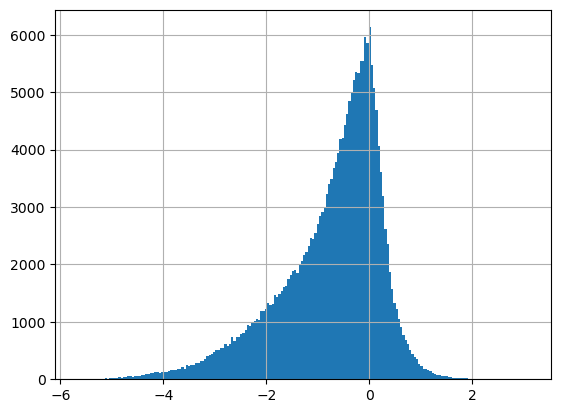

In [7]:
plt.hist(df['ddG_ML'], bins=200)
plt.grid()

##### Average ddg of all possible mutation (independent of the possition)

In [40]:
# Create a dictionary where the keys are the possible mutations, and the ddg values they got aling the whole dataset
ddg_mut_dir = {}

for row in df.itertuples():
    mut = str(row[4])
    ddg = row[3]
    for i in possible_mutation:
        i1 = i[0]
        i2 = i[1]
        if mut.startswith(i1) and mut.endswith(i2):
            if i in ddg_mut_dir.keys():
                ddg_mut_dir[i].append(ddg)
            else:
                ddg_mut_dir[i] = [ddg]        

# Creates a dataframe where the average ddg for the mutations will be saved
colums = ["mutation_type", "average_ddg"]
avg_ddg_df = pd.DataFrame(columns=colums)

# Calculate the average ddg for each mutation and save it in the dataset
c = 0
for element in ddg_mut_dir:
    ddgs = ddg_mut_dir[element]
    ddg_average = sum(ddgs)/len(ddgs)
    row = [element, ddg_average]
    avg_ddg_df.loc[c] = row
    c = c + 1 
    
avg_ddg_df
#avg_ddg_df.to_csv("mutation_average_ddg.csv")

,mutation_type,average_ddg
0,wt,0.003965
1,EQ,-0.219567
2,EN,-0.567139
3,EH,-0.392109
4,ED,-0.477974
...,...,...
376,CI,-0.032682
377,CW,-0.593085
378,CY,-0.558383
379,CF,-0.711431


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  1.,  1.,  1.,  0.,  1.,  1.,  2.,  0.,  2.,  1.,  0.,  1.,
         2.,  0.,  0.,  2.,  0.,  2.,  2.,  2.,  2.,  1.,  0.,  3.,  6.,
         2.,  0.,  1.,  1.,  1.,  5.,  2.,  0.,  1.,  1.,  2.,  0.,  4.,
         1.,  2.,  1.,  5.,  2.,  1.,  3.,  2.,  4.,  0.,  1.,  1.,  3.,
         1.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,  1.,  1.,  0.,  0.,  0.,
         5.,  1.,  3.,  2.,  1.,  2.,  2.,  1.,  2.,  7.,  5.,  1.,  2.,
         7.,  5.,  1.,  3.,  1.,  2.,  2.,  3.,  4.,  1.,  1.,  2.,  3.,
         3.,  5.,  5.,  3.,  2.,  5.,  3.,  4.,  0.,  1.,  9.,  2.,  3.,
         5.,  7.,  5.,  2.,  6.,  6.,  3.,  4.,  8.,  6.,  9.,  6.,  7.,
         8.,  6.,  7.,  3.,  2.,  3.,  6.,  7., 10.,  2.,  4.,  4.,  3.,
         0.,  4.,  2.,  0.,  3.,  0.,  1.,  4.,  2.

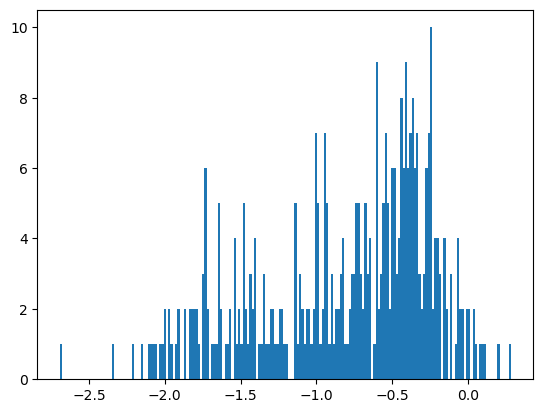

In [41]:
# Histogram distribution of average ddg of the mutations
plt.hist(avg_ddg_df['average_ddg'], bins=200)

## Average the ddg of each mutation independently of the original seuqence, only focusing on the position

In [15]:
# Create a dictionary where the keys are the possible mutations at a certain position, and the ddg values they got aling the whole dataset
ddg_mut_pos_dir = {}

# create a list with all possible position mutations ACTUALLY THIS IS "NOT NEEDED"
position_mutation_list = []
for mut in mutation_types:
    mut = mut[1:-1]
    position_mutation_list.append(mut)
p_m_list = list(set(position_mutation_list))

# extract the data and incorporate it to the dir
for row in df.itertuples():
    n_mut = str(row[4])[1:]
    ddg = row[3]
    #print(n_mut)
    if n_mut in ddg_mut_pos_dir.keys():
        ddg_mut_pos_dir[n_mut].append(ddg)
    else:
        ddg_mut_pos_dir[n_mut] = [ddg]     
        
# Creates a dataframe where the average ddg for the mutations will be saved
colums = ["mutation_type", "average_ddg"]
pos_avg_ddg_df = pd.DataFrame(columns=colums)        
                
# Calculate the average ddg 
c = 0
for element in ddg_mut_pos_dir:
    ddgs = ddg_mut_pos_dir[element]
    ddg_average = sum(ddgs)/len(ddgs)
    row = [element, ddg_average]
    pos_avg_ddg_df.loc[c] = row
    c = c + 1 
 
# Create datase with the averafe ddg   
new_pos_avg_ddg_df = pos_avg_ddg_df.iloc[1:]


longest_seq = len(p_m_list)


# Create empty matrix (dataframe with the mutations as columns and the protein aminoacid sequences as index
position_matrix = pd.DataFrame(columns = aa1, index = range(1, longest_seq+1))

# Load ddg values into the matrix
for row in new_pos_avg_ddg_df.itertuples():
    number = str(row[1])[:-1]   
    number_int = int(number)
    letter = str(row[1])[-1]
    ddg = row[2]
    
    position_matrix.at[number_int, letter] = ddg

# Transpose the matrix for better plotting
position_matrix_T = position_matrix.T
position_array = position_matrix_T.to_numpy(dtype=float)  # Transform pandas dataframe into numpy array
   

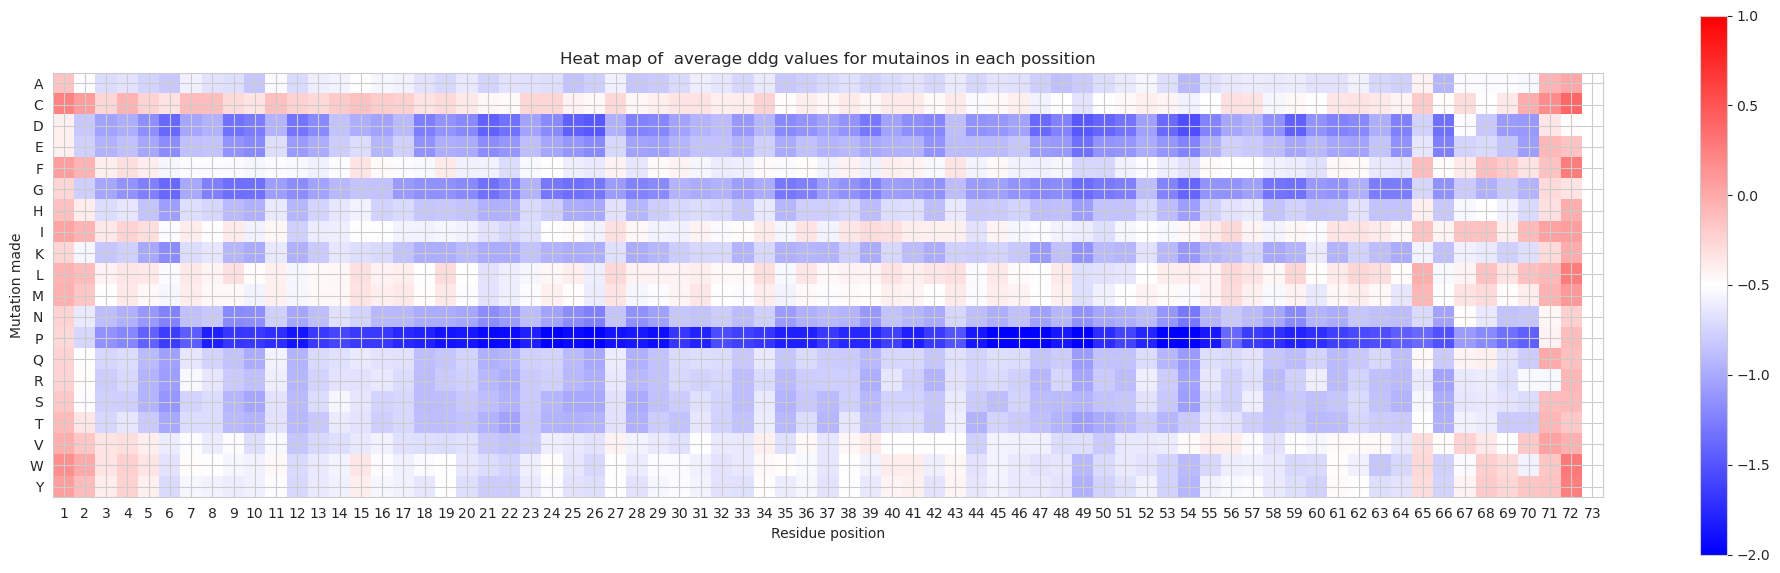

In [38]:
# Plot the heatmap
plt.figure(figsize=(25,7))
plt.imshow(position_array, cmap='bwr', vmin=-2, vmax=1)
plt.colorbar() # Adding a color bar

# Adding labels
plt.title(f"Heat map of  average ddg values for mutainos in each possition")
plt.xlabel("Residue position")
plt.ylabel("Mutation made")

plt.xticks(ticks=np.arange(position_matrix_T.shape[1]), labels=range(1, 73+1)) # Use "sequence_number" if you want to know the position of the aminoacids
plt.yticks(ticks=np.arange(position_matrix_T.shape[0]), labels=aa1)
plt.show()

<Axes: >

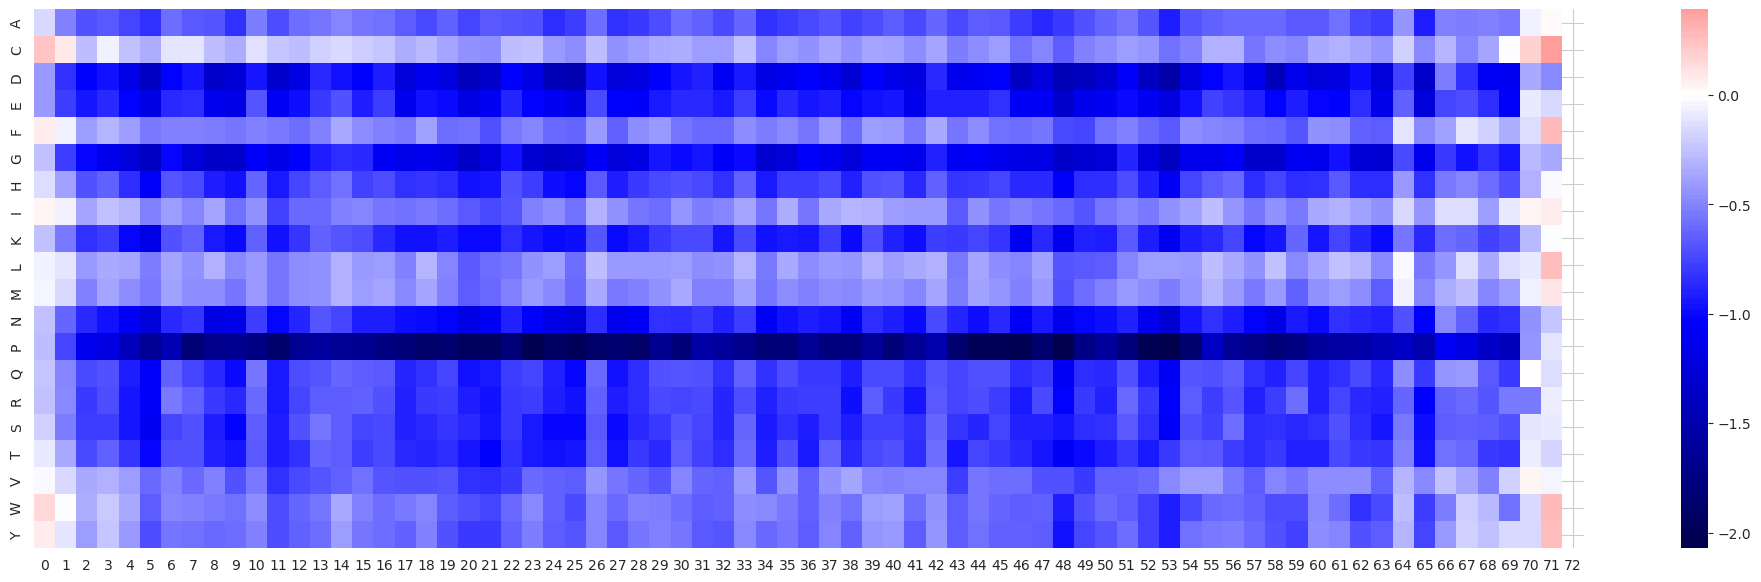

In [23]:
plt.figure(figsize=(25,7))

sns.heatmap(position_array, cmap='seismic', center=0, annot=False, yticklabels=aa1)

# HEATMAPS

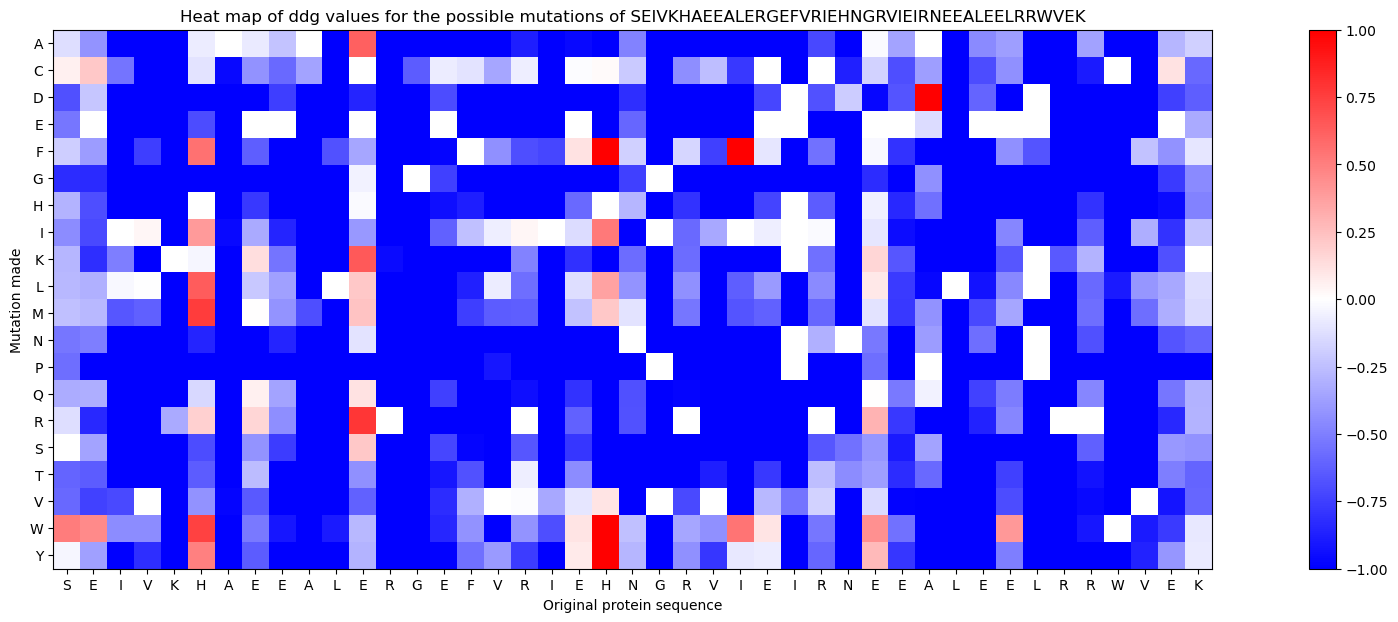

<Figure size 640x480 with 0 Axes>

In [17]:
# Extract the original sequences and store them as a list
unique_sequences = list(set(df['wt_seq']))
unique_sequences = unique_sequences[0:1]

#Plot heatmapt of the mutations
for sequence in unique_sequences:
    # Do a subset dataset with only the info of the desired sequence
    subseq_df = df[df['wt_seq'] == sequence] 
    
    aminoacids = aa1 # list of aminoacids (these are the possible mutations that can happen
    sequence_list = list(sequence) # Split the sequence into its aminoacids
    sequence_number = [] # list that will save each aminoacid of the sequence together with its position
    
    # Asing each aminoacid of the sequence its position and save it to the list
    c = 1
    for element in sequence_list: 
        sequence_number.append(f"{element}{c}")
        c = c + 1
        
    # Get list of the mutations made for the specific sequence (to check later if there is data about the specific mutation or not          
    made_mutations_list = list(subseq_df['mut_type']) 
    
    # Create empty matrix (dataframe with the mutations as columns and the protein aminoacid sequences as index
    sequence_matrix = pd.DataFrame(columns = aminoacids, index = sequence_number)
    
    # Fill the matrix with the ddg data
    for row in sequence_matrix.iterrows():
        aa = f"{row[0]}" # Aminoacid with its position number
        aa_name = aa[0] # Aminoacid without position numbers
        ddg_values = [] # List that will have the values of all mutations for each specific aminoacid
        for a in aminoacids:
            if a != aa_name: # Don't take into account mutations to the same aminoacid: A to A
                mutation = f"{aa}{a}" # Posible mutation
                if mutation in made_mutations_list: # Check that there is ddg information about the mutations (check the made_mutations_list)
                    mutation_ddg = subseq_df.loc[subseq_df['mut_type'] == mutation]["ddG_ML"].values[0]
                    # Add the data to the matrix
                    sequence_matrix.at[aa,a] = mutation_ddg
                
    # Replace NaN with 0       
    sequence_matrix.fillna(0)
    # Transpose the matrix so when plotting the sequence is in the "x" axis and mutaitons in th "y"
    sequence_matrix_T = sequence_matrix.T
    
    # Prepare data for plotting
    array = sequence_matrix_T.to_numpy(dtype=float)  # Transform pandas dataframe into numpy array
    
    # Plot the heatmap
    plt.figure(figsize=(25,7))
    plt.imshow(array, cmap='bwr', vmin=-1, vmax=1)
        
    plt.colorbar() # Adding a color bar
    
    # Adding labels
    plt.title(f"Heat map of ddg values for the possible mutations of {sequence}")
    plt.xlabel("Original protein sequence")
    plt.ylabel("Mutation made")
    
    plt.xticks(ticks=np.arange(sequence_matrix_T.shape[1]), labels=sequence_list) # Use "sequence_number" if you want to know the position of the aminoacids
    plt.yticks(ticks=np.arange(sequence_matrix_T.shape[0]), labels=aminoacids)
    plt.show()
    plt.savefig(f"ddg_heatmap_of_mutations_for_{sequence}.png")


# 3D structures

In [10]:
# Q2. Visualise alpha helices, beta sheets and binding sites
view = py3Dmol.view()
view.addModel(open('AF-Q13882-F1-model_v4.pdb', 'r').read(), 'pdb')
view.setStyle({
    'cartoon': {
        'colorscheme': {
            'prop': 'resi',
            'map': { resi + 1: 'red' if resi + 1 <100 else 'blue' for resi in range(500) },
        },
        'arrows': True,
    }
})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.